In [1]:
from image_generator_dataset import ImageGeneratorDataset

C:\Stuff\Acaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Stuff\Acaconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Stuff\Acaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Stuff\Acaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
icons_path = 'league_icons/'
dataset = ImageGeneratorDataset(icons_path + 'champions', icons_path + 'minimap', icons_path + 'fog', 
                                icons_path + 'misc', dataset_length = 30, resize = (256, 256))

num_classes = len(dataset.image_drawer.champion_icons)
print(dataset.image_drawer.champion_to_id)
print(num_classes)

{'aatrox': 1, 'ahri': 2, 'akali': 3, 'alistar': 4, 'amumu': 5, 'anivia': 6, 'annie': 7, 'aphelios': 8, 'ashe': 9, 'aurelionsol': 10, 'azir': 11, 'bard': 12, 'blitzcrank': 13, 'brand': 14, 'braum': 15, 'caitlyn': 16, 'camille': 17, 'cassiopeia': 18, 'chogath': 19, 'corki': 20, 'darius': 21, 'diana': 22, 'draven': 23, 'drmundo': 24, 'ekko': 25, 'elise': 26, 'evelynn': 27, 'ezreal': 28, 'fiddlesticks': 29, 'fiora': 30, 'fizz': 31, 'galio': 32, 'gangplank': 33, 'garen': 34, 'gnar': 35, 'gragas': 36, 'graves': 37, 'hecarim': 38, 'heimerdinger': 39, 'illaoi': 40, 'irelia': 41, 'ivern': 42, 'janna': 43, 'jarvaniv': 44, 'jax': 45, 'jayce': 46, 'jhin': 47, 'jinx': 48, 'kaisa': 49, 'kalista': 50, 'karma': 51, 'karthus': 52, 'kassadin': 53, 'katarina': 54, 'kayle': 55, 'kayn': 56, 'kennen': 57, 'khazix': 58, 'kindred': 59, 'kled': 60, 'kogmaw': 61, 'leblanc': 62, 'leesin': 63, 'leona': 64, 'lissandra': 65, 'lucian': 66, 'lulu': 67, 'lux': 68, 'malphite': 69, 'malzahar': 70, 'maokai': 71, 'mastery

In [3]:
import torch
import time
import cv2
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


In [4]:
batch_size = 1
num_workers = 0
custom_size = None
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers
                                         )

0.010777473449707031
0.010777473449707031


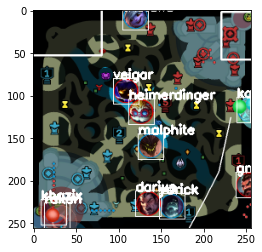

0.15140128135681152
0.15140128135681152


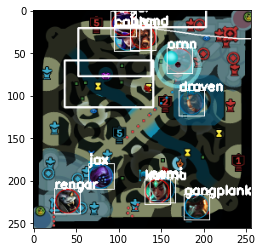

0.25911402702331543
0.25911402702331543


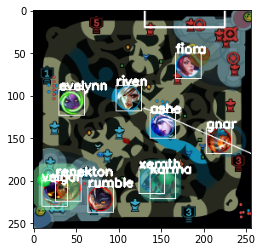

0.3598451614379883
0.3598451614379883


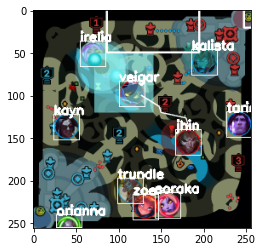

0.4625685214996338
0.4625685214996338


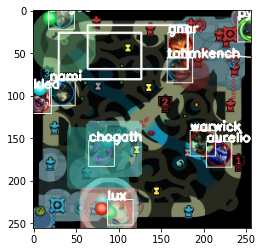

0.5603091716766357
0.5603091716766357


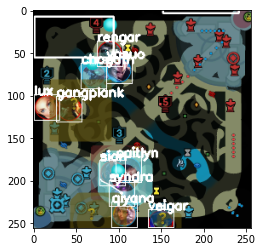

0.6560521125793457
0.6560521125793457


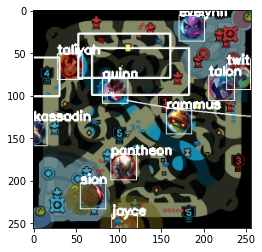

0.764761209487915
0.764761209487915


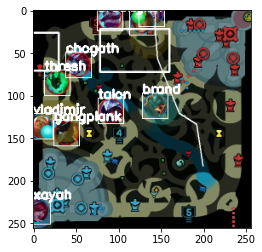

0.8694808483123779
0.8694808483123779


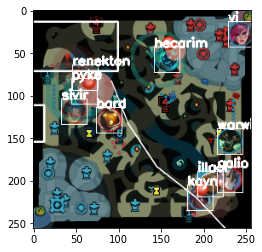

0.9743332862854004
0.9743332862854004


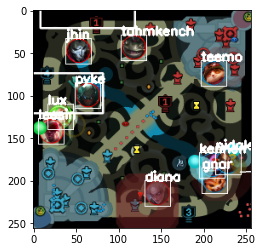

NameError: name 'aa' is not defined

In [5]:
itr = 0
start = time.time()
for entry in data_loader:
    end = time.time()
    print(end - start)
    img, champion_data = entry
    print(end - start)
    boxes = champion_data['boxes'].numpy().tolist()
    labels = champion_data['labels'].numpy().tolist()
    img = img[0].numpy().copy()
    for label, box in zip(labels[0], boxes[0]):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        if label == 0:
            print('YES')
        label = dataset.image_drawer.id_to_champion[label]
        img = img.transpose((1, 2, 0))

        img = img.copy()
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (1.0, 1.0, 1.0), 1)
        img = cv2.putText(img, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (1.0, 1.0, 1.0), thickness = 2, lineType = cv2.LINE_AA)

        img = img.transpose((2, 0, 1))

    img = torch.from_numpy(img)
    pil_img = transforms.ToPILImage()(img)
    plt.imshow(pil_img)
    plt.show()
    itr += 1
    if itr == 10:
        aa()

In [6]:
from image_drawer import ImageDrawer

import torch
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


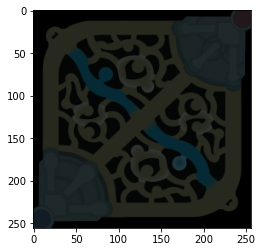

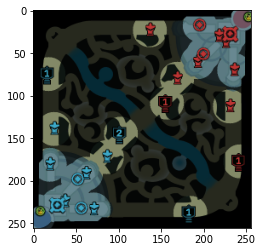

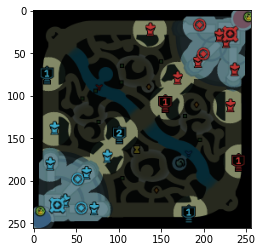

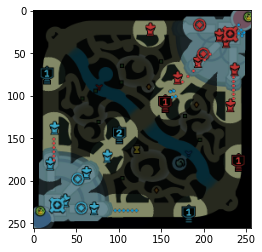

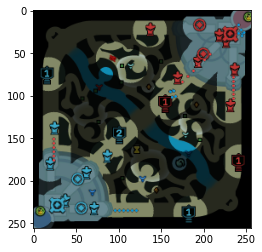

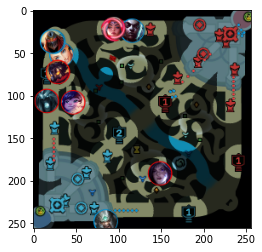

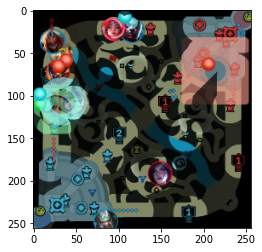

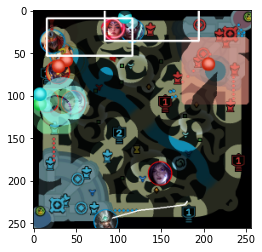

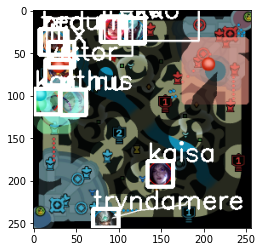

In [7]:
icons_path = 'league_icons/'
image_drawer = ImageDrawer(icons_path + 'champions', icons_path + 'minimap', icons_path + 'fog', 
                           icons_path + 'misc', resize = (256, 256))

overlay_operations = []
fog_filter_operations = []
frames = []

def DrawOperation(img, x, y):
    overlay_operations.append((img, x, y))

def FogFilterOperation(img, y, x):
    fog_filter_operations.append((img, x, y))
    
counter = 0
def DrawImage(minimap, overlay_operations, do_fog=True):
    minimap = minimap.copy()
    minimap = image_drawer.perform_overlay_operations(minimap, overlay_operations)
    if do_fog:
        minimap = image_drawer.perform_fog_operations(minimap, fog_filter_operations)
    
    overlay_operations = []
    
    img = image_drawer.perform_final_touches_to_image(minimap)
    pil_img = transforms.ToPILImage()(img)
    plt.imshow(pil_img)
    plt.show()
    
    frames.append(pil_img)
    
    global counter
    counter += 1
    
    pil_img.save('{}.png'.format(counter), 'PNG', optimize=False)
    
    return minimap

minimap = image_drawer.create_minimap()
DrawImage(minimap, overlay_operations)

image_drawer.draw_towers(minimap, DrawOperation, FogFilterOperation)
DrawImage(minimap, overlay_operations)

image_drawer.draw_neutral_camps_and_plants(minimap, DrawOperation)
DrawImage(minimap, overlay_operations)

image_drawer.draw_minions(minimap, DrawOperation, FogFilterOperation)
DrawImage(minimap, overlay_operations)

image_drawer.draw_wards(minimap, DrawOperation, FogFilterOperation)
DrawImage(minimap, overlay_operations)

ally_champions, enemy_champions = image_drawer.create_ally_and_enemy_champions()
champion_position_data = image_drawer.draw_champions(minimap, DrawOperation, FogFilterOperation, ally_champions, enemy_champions)
DrawImage(minimap, overlay_operations)

image_drawer.draw_pings(minimap, DrawOperation, FogFilterOperation, champion_position_data=champion_position_data)
minimap = DrawImage(minimap, overlay_operations)

fog_filter_operations = []
overlay_operations = []

minimap = image_drawer.draw_lines_and_boxes(minimap, champion_position_data)
minimap = DrawImage(minimap, overlay_operations, False)

frames[0].save('layered_minimap.gif', format='GIF', append_images=frames[1:], optimize=False, save_all=True, duration=750, loop=0)

img = image_drawer.perform_final_touches_to_image(minimap).numpy().copy()

champion_data = image_drawer.convert_champion_position_data_to_coco_format(champion_position_data, 0)
boxes = champion_data['boxes'].numpy().tolist()
labels = champion_data['labels'].numpy().tolist()
for label, box in zip(labels, boxes):
    x1, y1, x2, y2 = box
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    label = image_drawer.id_to_champion[label]

    img = img.transpose((1, 2, 0))

    img = img.copy()
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (1.0, 1.0, 1.0), 3)
    img = cv2.putText(img, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (1.0, 1.0, 1.0), thickness = 2, lineType = cv2.LINE_AA)

    img = img.transpose((2, 0, 1))

img = torch.from_numpy(img)
pil_img = transforms.ToPILImage()(img)
plt.imshow(pil_img)
plt.show()


In [8]:
import numpy as np
icons_path = 'league_icons/'
image_drawer = ImageDrawer(icons_path + 'champions', icons_path + 'minimap', icons_path + 'fog', 
                           icons_path + 'misc', resize = (256, 256))

# calculate average time per generation (one thread)

times = []
for i in range(1000):
    start = time.time()
    image_drawer.generate_data(0)
    end = time.time()
    times.append(end - start)
print(np.mean(times))


0.0424872374534607


In [9]:
icons_path = 'league_icons/'
dataset = ImageGeneratorDataset(icons_path + 'champions', icons_path + 'minimap', icons_path + 'fog', 
                                icons_path + 'misc', dataset_length = 1000, resize = (256, 256), thread_pool_size=4)

start = time.time()

while not dataset.datas.full():
    time.sleep(0.05)
    #print(dataset.datas.qsize())

end = time.time()

print((end - start) / 1000)


TypeError: can't pickle _thread.lock objects